# ___
# [ Geoinformatika ]

## Strojové učení


**Katedra aplikované geoinformatiky a kartografie**, Přírodovědecká fakulta, Univerzita Karlova
Albertov 6, 128 43 Praha 2

*Lukáš Brodský lukas.brodsky@natur.cuni.cz*

### Rozhodovací strom *(Decision tree)* v Pythonu 


Tento Jupyter notbooku demonstruje strojové učení s využitím algoritmu rozhodovací strom z knihovny Scikit learn (*https://scikit-learn.org*). 


Rozhodovaci strom je acyklický graf. 
Princip (pravidla s prahovou hodnotou): 
1/ příznak < prahová_hodnota  -> pokračuj v levé větvi stromu, jinak vpravo, 
2/ po dosažení listu rozhodneme o klasifikované třídě. 

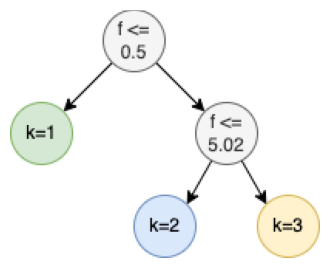

In [2]:
# vizualizace stromu 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
%matplotlib inline 

dt = mpimg.imread('rozhodovaci_strom.png')
plt.figure(figsize=(4, 4), dpi=100)
plt.axis('off')
plt.imshow(dt)

**Popis stromu**: 

* Kořenový uzel: první uzel, kde dochází k rozdělení.    
* Uzel Leaf: uzel, po kterém už nedochází k větvení.
* Rozhodovací uzel: uzel vytvořený po rozdělení dat z předchozího uzlu je známý jako rozhodovací uzel.    
* Větev: subsekce stromu obsahující informace o následcích rozdělení v rozhodovacím uzlu.
   

**Definice problému**: 
Mějme množinu dat s referencemi (lables) nabívající  hodnot {0, 1}. Chceme sestrojit rozhodovací strom, který předpoví třídu na základě vstupního vektoru příznaků. Hledáme nejlepší pravidla která rozdělí množinu pozorovaných hodnot, tak že získáme nejlepší podobnost s referencí.

**Řešení**: 
Hledáme řešení přes všechny příznaky j = 1,…,D a všechny prahové hodnoty t a rozdělujem množinu S na dvě podmnožiny: S- a S+. Pro všechny možné kombinace (j, t) hodnotíme jak dobré je rozdělení na podmnožiny S- a S+. Nakonec vybereme nejlepší řešení. 

**Jak?**

Potřebujeme **rozhodovací kritérium**: např. Gini index 

$$ Gini = 1 - ∑(p_t^2), $$ 

    kde pt je relativní počet příkladů t-té třídy zjišťovaný na nějaké (pod)množině.


**Sestavení stromu**: 
Iterace, pro větvení použijeme atribut, který bude mít nejmenší hodnotu tohoto indexu. 

**Algoritmus končí když**:
* Jsou všechny reference klasifikovány v listu, 
* Strom dosáhne určité definované hloubky (max_depth), 
* Nemůže nalézt příznak na základě kterého by dále dělil podmnožinu, 
* Případně, rozdělení redukuje Gini méně než definovaná hodnota epsilon.


**Výhody**: 
    
+ jednoduchý a interpretovatelný algoritmus
+ nepotřebuje žádné parametrické předpoklady 
+ je robustní z pohledu před-zpracování dat 
+ rychlý 

**Nevýhody**:
- k větvení dochází v každém kroku iterace, nelze zaručit optimální řešení => přetrénování 
- nestabilita (mala varibilita dat  -> kompletně jiné větvení) 
- předpojatost / zkreslení (bias) jestliže máme větší počet vzorků / referncí jedné třídy (nerovnováha dat) 

### Měření míry úspěchu

Specificita (*precision*) obecně říká, kolik vzorků označených za pozitivních je opravdu pozitivních.

$$ precision = \frac{TP}{TP+FP} $$

TP označuje počet správně označených pozitivních vzorků (*true positives*)
FP označuje počet falešně pozitivních vzorků (*false negatives*)

Senzitivita (*recall*) testu obecně vyjadřuje kolik pozitivních vzorků bylo podchyceno klasifikátorem (klasifikováno jako pozitivní).


$$ recall = \frac{TP}{TP+FN} $$

FN je počet falešně negativních vzorků (*false negatives*)


Zda je pro nás důležitější *precision* nebo *recall*, záleží na konkrétní úloze. Někdy vadí více falešně pozitivní případy (např. příliš mnoho relevantních mailů označených za spam), jindy bude více vadit nezachycený pozitivní případ (např. neodhalený výskyt nemoci).

Další často používanou metrikou je tzv. **F1 skóre**. Kombinuje *precision* a *recall*, a to tak, že obě tyto metriky mají stejnou váhu (přizpívají stejnou měrou k výsledku). Čím větší hodnota, tím lepší výsledek. Maximální hodnota je jedna, minimální 0.

$$ F1 = 2 \frac{precision \cdot recall}{precision + recall}$$



S použitím F1-skóre balancujeme *precision* a *recall* (harmonický průměr). Tuto metriku vybereme pro hodnocení úspěšnosti našeho modelu pro tento problem!  


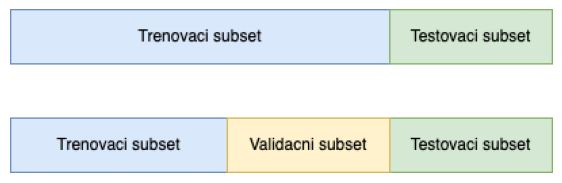

In [3]:
# rozdeleni data setu na trenovaci, validacni a testovaci

ds = mpimg.imread('rozdeleni_trenovani_testovani.png')
plt.figure(figsize=(7, 5), dpi=100)
plt.axis('off')
plt.imshow(ds)

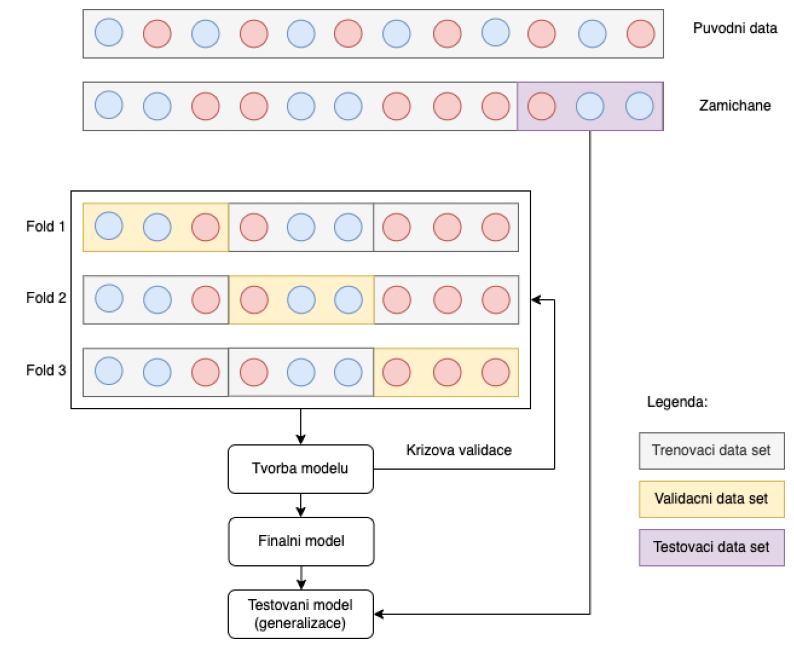

In [4]:
# krizova validace

ds = mpimg.imread('krizova_validace.png')
plt.figure(figsize=(10, 10), dpi=100)
plt.axis('off')
plt.imshow(ds)

### Řešený problem pomocí rozhodovacího stromu: 
Klasifikace druhů kosatců na základě jejich vlastností (délka a šířka okvětních a kališních lístků).  

### Knihovny pro praci

    * NumPy 
    * Pandas 
    * Matplotlib / Seaborn 
    * Scikit-learn 

In [5]:
# Knihovny

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Jupyter notebook vizualizace
%matplotlib inline
import seaborn as sns

# kodovani 
from sklearn.preprocessing import LabelEncoder
# rozdeleni na trenovaci a testovaci dataset 
from sklearn.model_selection import train_test_split
# trida klasifikatoru rozhodovaci strom 
from sklearn.tree import DecisionTreeClassifier
# validacni indikatory a procedury 
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
# vizualizace stromu 
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

### 1. Ziskani (nacteni) vstupnich dat

In [6]:
# vstupni data
df = sns.load_dataset('iris') 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2. Explorace vstupnich dat 

In [7]:
# zakladni info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


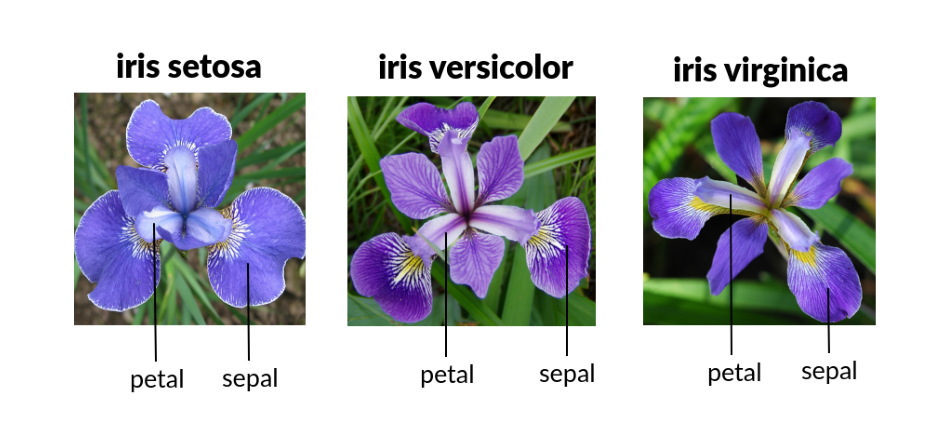

In [9]:
# vizualizace kvetu

img = mpimg.imread('iris-dataset.png')
plt.figure(figsize=(15, 10), dpi=80)
plt.axis('off')
plt.imshow(img)
# okvětní lístek a kališní lístek 

In [10]:
# dimenzionalita vstupni matice 
# df ... promena typu Pandas DataFrame
# shape ... metoda vraci dimenzionalitu vstupnich dat 
pass 

In [11]:
# chybejici atributy? 
# isnull() ... metoda vrati T/F 
# any() ... vyhodnoti stav pro kazdy atribut (feature) 
pass 

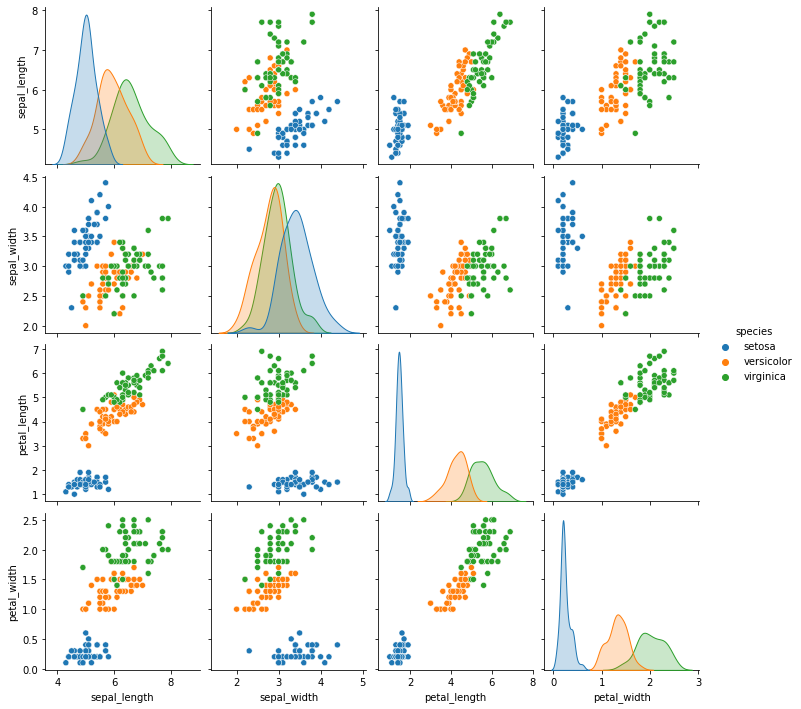

In [12]:
# vizualizace atributu - pruzkumova analyza 
# Seaborn pariplot ... vykresli kombinace vsech priznaku
# hue ... zmena barvy dle kodu atributu 

sns.pairplot(data=df, hue = 'species')

In [13]:
# Jak slozita je uloha klasifikace? 
# Existuje v datech linearni separabilita? 
# Kde je nejvetsi problem? 
# Jake priznaky (vlastnosti kvetu) povazujete za dulezite pro klasifikaci? 

In [14]:
# existuji korelace (linerani zavislosti) v matici priznaku?
# sns.heatmap(df.corr(), cmap="Greens")

## 3. Priprava dat

X .. priznaky (vstupni meren veliciny)

y .. priklady ocekavaneho vystupu (refernce)

X_train & y_train .. subset pro trenovani modelu 

X_test & y_test .. subset pro testovani modelu 

X_val & y_val .. subset pro validaci modelu v procesu ladeni hyperparametru vytvorime v pripade, ze mame dostatecne mnozstvi referenci. 


In [15]:
# jak jsou pojmenovany sloupce v datove tabulce? 
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [16]:
# Jake jsou nase klasifikacni tridy? 
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
# Vstupni data zpravidla rozdelime do dvou promennych: 
# X ... priznaky 
# y ... reference s cilovou hodnotou 

In [18]:
reference = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis = 1)
X = df1

In [19]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
reference.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [21]:
# stringy trid prevedem do ciselnych hodnot 
le = LabelEncoder()
cis_kody = le.fit_transform(reference) 
cis_kody

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
# kodovani 
spec_kod  = pd.concat([df['species'], pd.DataFrame(cis_kody)], axis=1)

for col in spec_kod:
    print(spec_kod[col].unique())

['setosa' 'versicolor' 'virginica']
[0 1 2]


In [23]:
# kodovane reference 
y = cis_kody
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 3.1 Rozdeleni na trenovaci a testovaci dataset 

In [24]:
# 3.1 A nahodne rozdeleni metodou train_test_split() z sklearn 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 
# overte parametrizaci 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.4, random_state = 42)

print("Trenovaci mnozina ", X_train.shape)
print("Testovaci mnozina ", X_test.shape)

Trenovaci mnozina  (90, 4)
Testovaci mnozina  (60, 4)


### 4. Modelovani a testovani stromu

In [26]:
# vytvor instanci tridy pro rozhodovaci strom 
# a nastav rucne hyperparametry: max. depth, min. samples, splitter
strom = DecisionTreeClassifier(max_depth=3, min_samples_split=2, 
                               splitter='random', random_state = 42) 

In [27]:
strom

DecisionTreeClassifier(max_depth=3, random_state=42, splitter='random')

### 4.1. Tvorba modelu

In [28]:
# prvni "fitovani" modelu - nalezeni parametru modelu 

strom.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42, splitter='random')

### 4.2. Validace modelu

In [29]:
# predikce 
strom.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1])

In [30]:
# krizova validace stromu - presnost modelu v procesu trenovani 
# cross_validate() cv=5 -> 5x opakovane 
cv_strom = cross_validate(strom, X_train,y_train, cv=5, scoring='f1_macro', return_estimator=True)
print('Krizova validace!')

Krizova validace!


In [31]:
cv_strom['test_score']

array([0.84242424, 0.79365079, 0.94405594, 0.94405594, 1.        ])

In [32]:
print('Prumer vazeneho F1-skore: {:.3f} a std {:.3f}'.format(
        cv_strom['test_score'].mean(),
        cv_strom['test_score'].std())
     )

Prumer vazeneho F1-skore: 0.905 a std 0.075


In [33]:
y_test_pred = strom.predict(X_test)
round(f1_score(y_test, y_test_pred, average='macro'), 3)

0.982

Text(0.5, 1.0, 'F1-score: 0.982')

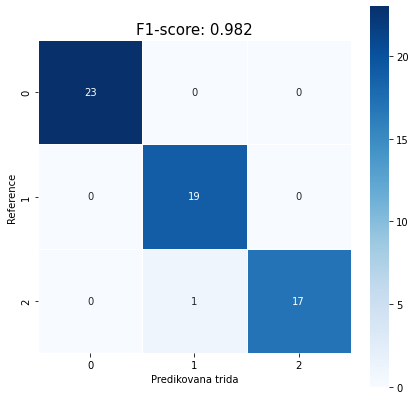

In [34]:
# konfuzni matice 
cm = confusion_matrix(y_test, y_test_pred) 
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True, square=True, cmap='Blues')
plt.ylabel('Reference')
plt.xlabel('Predikovana trida')
all_sample_title = 'F1-score: {0}'.format(round(f1_score(y_test, y_test_pred, average='macro'), 3))
plt.title(all_sample_title, size = 15)

In [35]:
# Je vysledek dostatecny? 

In [36]:
# Jiny algoritmus klasifikace? 
# David Wolpert (1996) - "No Free Lunch Therem" - if you make absolutely no assumption about the data, 
# there is no reason to prefer one model over any other!

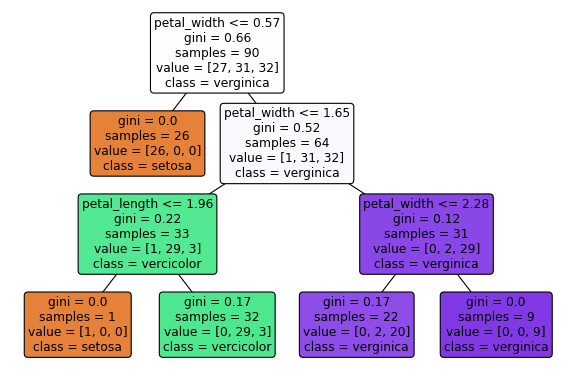

In [37]:
# Visualizace stromu 
figure(figsize=(9, 6), dpi=80)
rozhodovaci_strom = plot_tree(decision_tree=strom, feature_names = df1.columns,
class_names =["setosa", "vercicolor", "verginica"] , filled=True ,  precision=2, rounded=True)

In [ ]:
# Ktere priznaky jsou dulezite pro klasifikaci? 

In [ ]:
# Ukol 1: oznacte chybe klasifikovane prvky v grafu priznakoveho prostoru
# viz. sns.pairplot(data=df, hue = 'species')

In [ ]:
# sns.scatterplot(data=viz_chyby, x="petal_length", y="petal_width", hue="species", style="chyby") 

In [ ]:
# Ukol 2: vyzkousejte stratifikovane rozdeleni na trenovaci a testovaci dataset

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print('.')
    # print("TRAIN:", train_index)
    # print("TEST:", test_index)
    # X_train = X.iloc[train_index]
